# Basics

In [9]:
import qiskit as qk
import numpy as np

## Hadamard gate circuit

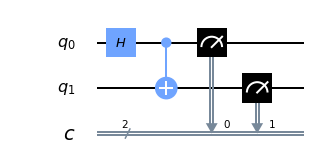

In [23]:
circuit = qk.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1],[0,1])
circuit.draw(output="mpl")

## Not gate circuit

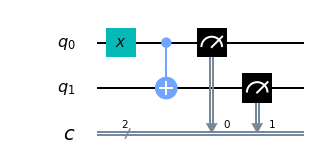

In [11]:
circuit = qk.QuantumCircuit(2,2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0,1],[0,1])
circuit.draw(output="mpl")

## Reading token numbers & loading accounts

In [12]:
from qiskit import IBMQ
IBMQ.save_account(open("token.txt","r").read())

Credentials already present. Set overwrite=True to overwrite.


In [13]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Status of Providers

In [14]:
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
    print(
        f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits"
    )

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 100 queued and 5 qubits
ibmq_16_melbourne has 115 queued and 15 qubits
ibmq_vigo has 4 queued and 5 qubits
ibmq_ourense has 74 queued and 5 qubits
ibmq_london has 19 queued and 5 qubits
ibmq_burlington has 2 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits
ibmq_armonk has 1 queued and 1 qubits


## Real quantum computer

In [19]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmq_burlington')
job = qk.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


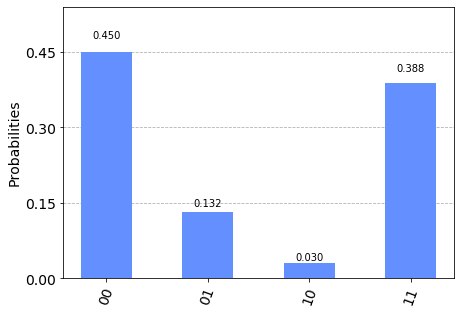

In [20]:
from qiskit.visualization import plot_histogram
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

## Simulated Quantum Computer

Job Status: job has successfully run


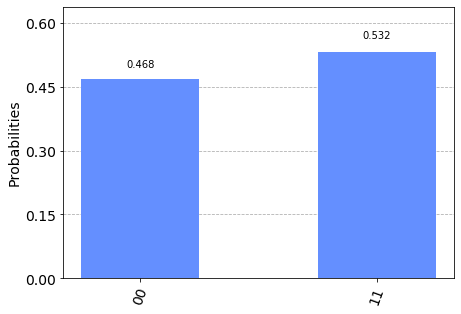

In [21]:
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_qasm_simulator')
job = qk.execute(circuit, backend=backend, shots=500)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])